In [35]:
import cv2
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.signal as sig
from scipy import ndimage as ndi
from PIL import Image
from skimage import data

In [116]:
## reference : 
# (1)https://muthu.co/harris-corner-detector-implementation-in-python/ 
# (2)https://github.com/adityaintwala/Harris-Corner-Detection/blob/master/find_harris_corners.py

def find_harris_corners(input_img, k, window_size, threshold):
    input_img = cv2.resize(input_img,(500,300), interpolation=cv2.INTER_AREA)
    ## Step 1: Covert the image to Grayscale
    output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_BGR2GRAY)
    
    
    ## Step 2: Spatial derivative calculation
    def  gradient_x(img):
    ## sobel filter (gradient)
        kernelx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
        return sig.convolve2d(img,kernelx,mode="same")

    def  gradient_y(img):
        ## sobel filter (gradient)
        kernely = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
        return sig.convolve2d(img,kernely,mode="same")

    Ix = gradient_x(output_img)
    Iy = gradient_y(output_img)

    ## Step 3: Structure tensor setup
    Ixx = ndi.gaussian_filter(Ix**2, sigma=1)
    Ixy = ndi.gaussian_filter(Iy*Ix, sigma=1)
    Iyy = ndi.gaussian_filter(Iy**2, sigma=1)

    ## Step 4: Harris response calculation
    #Step4-1: sliding windows
    '''
    window_size = 3
    offset = window_size/2 = 1
    '''
    edge_copy = input_img.copy()
    cornor_copy = input_img.copy() 
    offset = int(window_size/2)
    for y in range(offset,output_img.shape[0]-offset):
        for x in range(offset,output_img.shape[1]-offset):
            start_y = y-offset
            start_x = x -offset
            end_y = y+offset+1
            end_x = x+offset+1
            Sxx=np.sum(Ixx[start_y:end_y,start_x:end_x])
            Sxy=np.sum(Ixy[start_y:end_y,start_x:end_x])
            Syy=np.sum(Iyy[start_y:end_y,start_x:end_x])

            det_M = Sxx*Syy-Sxy**2
            trace_M = Sxx +Syy
            R = det_M - k*(trace_M**2)
            if R>threshold:
                ## cornor = blue 
                cornor_copy[y,x] = (255,0,0)
            elif R < -threshold:
                ## edge = red 
                edge_copy[y,x] = (0,0,255)

    cornor_copy = cv2.cvtColor(cornor_copy, cv2.COLOR_BGR2RGB)
    edge_copy = cv2.cvtColor(edge_copy, cv2.COLOR_BGR2RGB)

    return cornor_copy,edge_copy

<ipython-input-116-619125640059>:49: RuntimeWarning: overflow encountered in long_scalars
  det_M = Sxx*Syy-Sxy**2


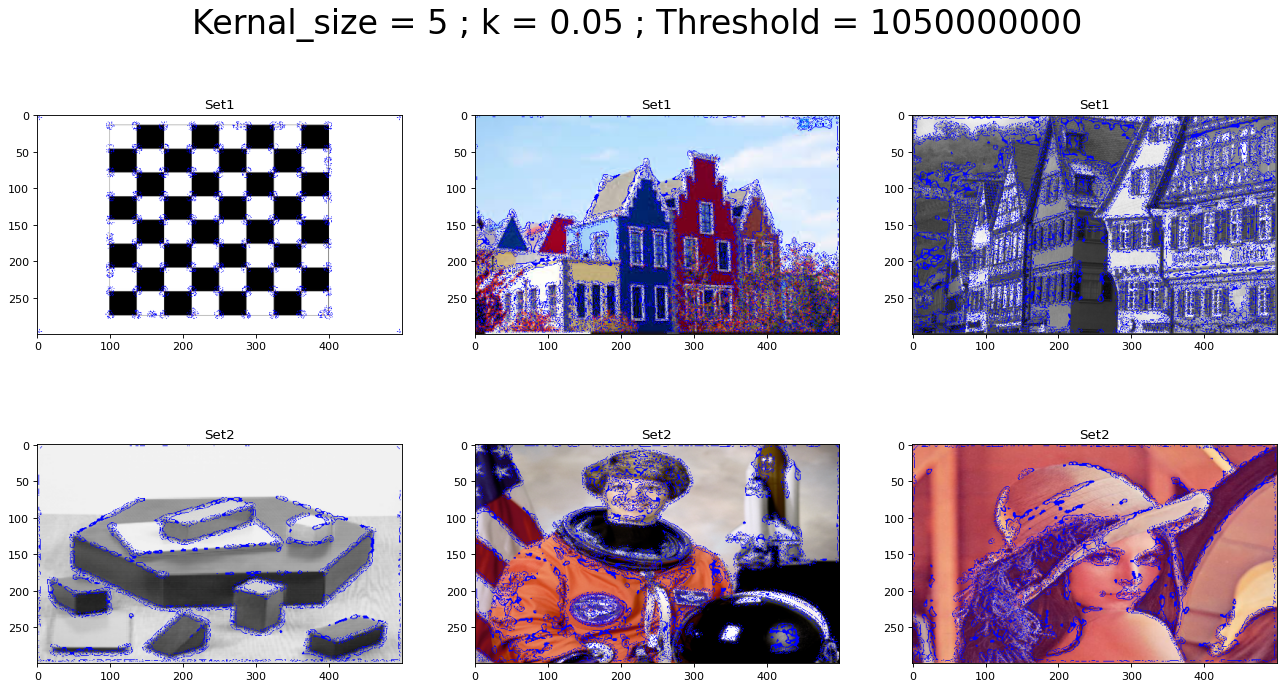

In [138]:
## DATA : https://github.com/scikit-image/scikit-image/tree/main/skimage/data

################################   Kernal_size = 5 ; k = 0.05 ; Threshold = 1050000000   ################################
####   SET 1   ####
# screenshot
screenshot=cv2.imread("screenshot.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor1,edge  =  find_harris_corners(screenshot,0.05, 5, 1050000000)

# plot result
figure(figsize=(20, 10), dpi=80)
ax = plt.subplot(231)
ax.title.set_text('Set1')
plt.imshow(cornor1)

# images
images=cv2.imread("images.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor2,edge  =  find_harris_corners(images,0.05, 5, 1050000000)

# plot result
ax = plt.subplot(232)
ax.title.set_text('Set1')
plt.imshow(cornor2)


# kodim08_grayscale
kodim08_grayscale=cv2.imread("kodim08_grayscale.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor3,edge  =  find_harris_corners(kodim08_grayscale,0.05,5,1050000000)
# plot result
ax = plt.subplot(233)
ax.title.set_text('Set1')
plt.imshow(cornor3)



####   SET 2   ####
# BLOCK
BLOCK_test=cv2.imread("BLOCK.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor4,edge  =  find_harris_corners(BLOCK_test,0.05, 5, 1050000000)

# plot result
ax = plt.subplot(234)
ax.title.set_text('Set2')
plt.imshow(cornor4)

# astronaut
astronaut=cv2.imread("astronaut.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor5,edge  =  find_harris_corners(astronaut,0.05, 5, 1050000000)

# plot result
ax = plt.subplot(235)
ax.title.set_text('Set2')
plt.imshow(cornor5)


# kodim08_grayscale
mp2a=cv2.imread("mp2a.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor6,edge  =  find_harris_corners(mp2a,0.05,5,1050000000)
# plot result
ax = plt.subplot(236)
ax.title.set_text('Set2')
plt.imshow(cornor6)

plt.suptitle('Kernal_size = 5 ; k = 0.05 ; Threshold = 1050000000',fontsize=30)
plt.show()

<ipython-input-116-619125640059>:49: RuntimeWarning: overflow encountered in long_scalars
  det_M = Sxx*Syy-Sxy**2


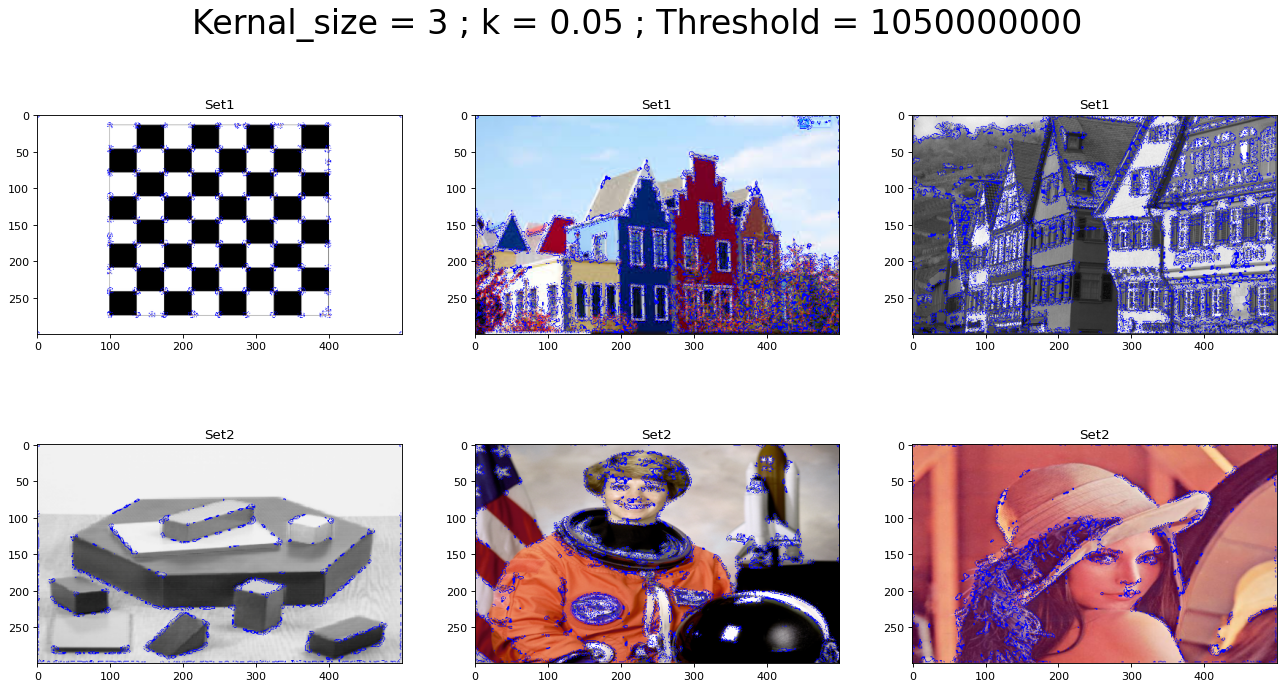

In [139]:
################################   Kernal_size = 3 ; k = 0.05 ; Threshold = 1050000000   ################################
####   SET 1   ####
# screenshot
screenshot=cv2.imread("screenshot.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor1,edge  =  find_harris_corners(screenshot,0.05, 3, 1050000000)

# plot result
figure(figsize=(20, 10), dpi=80)
ax = plt.subplot(231)
ax.title.set_text('Set1')
plt.imshow(cornor1)

# images
images=cv2.imread("images.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor2,edge  =  find_harris_corners(images,0.05, 3, 1050000000)

# plot result
ax = plt.subplot(232)
ax.title.set_text('Set1')
plt.imshow(cornor2)


# kodim08_grayscale
kodim08_grayscale=cv2.imread("kodim08_grayscale.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor3,edge  =  find_harris_corners(kodim08_grayscale,0.05,3,1050000000)
# plot result
ax = plt.subplot(233)
ax.title.set_text('Set1')
plt.imshow(cornor3)



####   SET 2   ####
# BLOCK
BLOCK_test=cv2.imread("BLOCK.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor4,edge  =  find_harris_corners(BLOCK_test,0.05, 3, 1050000000)

# plot result
ax = plt.subplot(234)
ax.title.set_text('Set2')
plt.imshow(cornor4)

# astronaut
astronaut=cv2.imread("astronaut.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor5,edge  =  find_harris_corners(astronaut,0.05, 3, 1050000000)

# plot result
ax = plt.subplot(235)
ax.title.set_text('Set2')
plt.imshow(cornor5)


# kodim08_grayscale
mp2a=cv2.imread("mp2a.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor6,edge  =  find_harris_corners(mp2a,0.05,3,1050000000)
# plot result
ax = plt.subplot(236)
ax.title.set_text('Set2')
plt.imshow(cornor6)

plt.suptitle('Kernal_size = 3 ; k = 0.05 ; Threshold = 1050000000',fontsize=30)
plt.show()

<ipython-input-116-619125640059>:49: RuntimeWarning: overflow encountered in long_scalars
  det_M = Sxx*Syy-Sxy**2


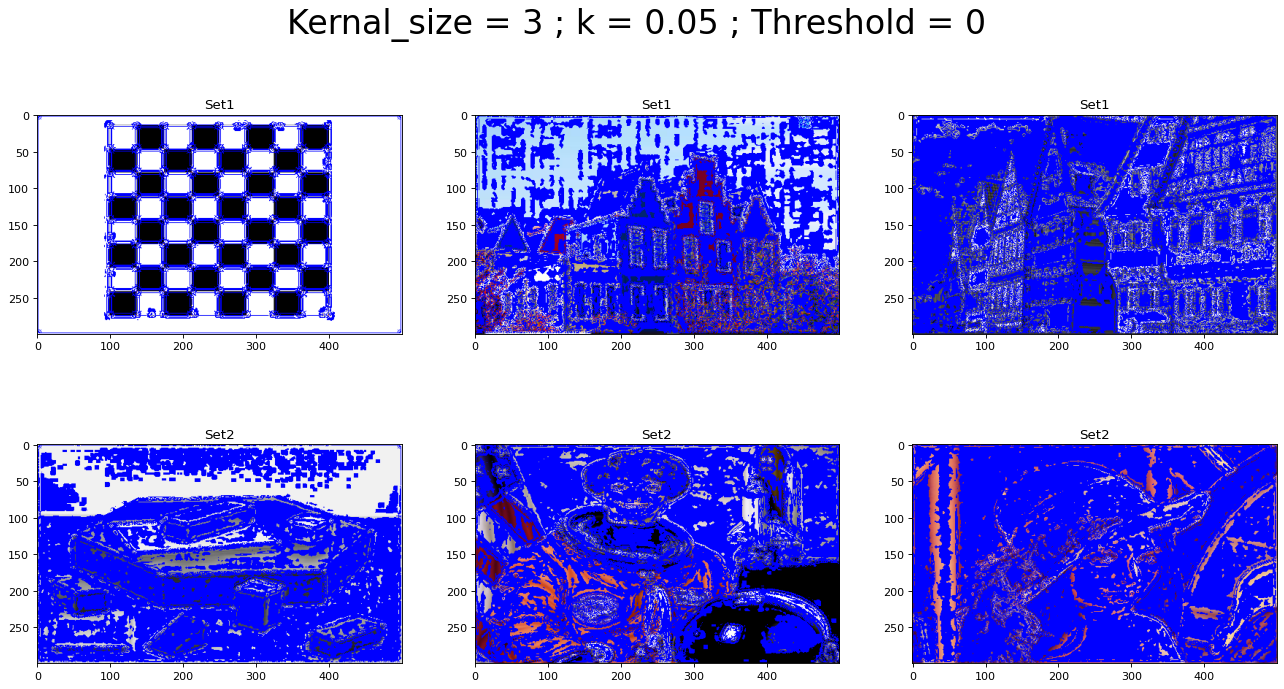

In [140]:
################################   Kernal_size = 3 ; k = 0.05 ; Threshold = 0   ################################
####   SET 1   ####
# screenshot
screenshot=cv2.imread("screenshot.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor1,edge  =  find_harris_corners(screenshot,0.05, 3, 0)

# plot result
figure(figsize=(20, 10), dpi=80)
ax = plt.subplot(231)
ax.title.set_text('Set1')
plt.imshow(cornor1)

# images
images=cv2.imread("images.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor2,edge  =  find_harris_corners(images,0.05, 3, 0)

# plot result
ax = plt.subplot(232)
ax.title.set_text('Set1')
plt.imshow(cornor2)


# kodim08_grayscale
kodim08_grayscale=cv2.imread("kodim08_grayscale.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor3,edge  =  find_harris_corners(kodim08_grayscale,0.05,3,0)
# plot result
ax = plt.subplot(233)
ax.title.set_text('Set1')
plt.imshow(cornor3)



####   SET 2   ####
# BLOCK
BLOCK_test=cv2.imread("BLOCK.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor4,edge  =  find_harris_corners(BLOCK_test,0.05, 3, 0)

# plot result
ax = plt.subplot(234)
ax.title.set_text('Set2')
plt.imshow(cornor4)

# astronaut
astronaut=cv2.imread("astronaut.png",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor5,edge  =  find_harris_corners(astronaut,0.05, 3, 0)

# plot result
ax = plt.subplot(235)
ax.title.set_text('Set2')
plt.imshow(cornor5)


# kodim08_grayscale
mp2a=cv2.imread("mp2a.jpg",1)
# find_harris_corners(image,k, window_size, threshold) ，k = 0.04~0.06
cornor6,edge  =  find_harris_corners(mp2a,0.05,3,0)
# plot result
ax = plt.subplot(236)
ax.title.set_text('Set2')
plt.imshow(cornor6)

plt.suptitle('Kernal_size = 3 ; k = 0.05 ; Threshold = 0',fontsize=30)
plt.show()